<p><h4>AIRBNB DUOMENŲ ANALIZĖ</h4><p/>
BANGKOKAS


Duomenų importavimas

In [1]:
import datetime
import re
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns           #dar viena paišymo biblioteka, moka dirbt su pandas
import scipy.signal as signal    
sns.set()

In [2]:
#atsisiunčiame duomenis
bnb_listings_file=pathlib.Path('../data/Barcelona/listings.csv')
bnb_calendar_file=pathlib.Path('../data/Barcelona/calendar.csv')
bnb_review_file=pathlib.Path('../data/Barcelona/reviews.csv')


listings = pd.read_csv(bnb_listings_file, index_col="id")
calendar = pd.read_csv(bnb_calendar_file, parse_dates=["date"],index_col=["listing_id"])
reviews=pd.read_csv(bnb_review_file, parse_dates=["date"],index_col=["listing_id"])


In [34]:
listings

name  \
id                                                                      
673276379194656210                          Habitación muy acogedora.   
44192271                Cozy terrace apartment\nApartamento con patio   
196021              Large patio, 4 baths (3 en-suite), 19th c, cen...   
196196              ✨Large Apt near Sagrada Familia / Shared terrace✨   
18674                 Huge flat for 8 people close to Sagrada Familia   
...                                                               ...   
26383234            LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM   
26383143            LOVELY PRIVATE ROOM FOR 6 GUESTS ENSUITE BATHROOM   
26384664            HABITACION PRIVADA DE 6 CAMAS CON TERRAZA PRIVADA   
18220085            Chillout house,  with garden and pool  for family   
5122846             3 Peaceful, double bedrooms in musical family ...   

                      host_id                     host_name  \
id                                                            
673276379194656210   51421682              Maria Das Merces   
44192271            200754964                         Nuria   
196021                 953719                         Julia   
196196                 567180                        Sandra   
18674                   71615              Mireia And Maria   
...                       ...                           ...   
26383234            198281707  Casa Barcelo Camp Nou Hostel   
26383143            198281707  Casa Barcelo Camp Nou Hostel   
26384664            198281707  Casa Barcelo Camp Nou Hostel   
18220085             10030977              Sven Et Michaela   
5122846               1145453                        Zabeth   

                    neighbourhood_group  \
id                                        
673276379194656210       Sants-Montjuïc   
44192271                      Les Corts   
196021                         Eixample   
196196                         Eixample   
18674                          Eixample   
...                                 ...   
26383234                      Les Corts   
26383143                      Les Corts   
26384664                      Les Corts   
18220085                      Les Corts   
5122846             Sarrià-Sant Gervasi   

                                            neighbourhood   latitude  \
id                                                                     
673276379194656210                             la Bordeta  41.363004   
44192271                       la Maternitat i Sant Ramon  41.372630   
196021                    l'Antiga Esquerra de l'Eixample  41.388420   
196196                                 la Sagrada Família  41.406600   
18674                                  la Sagrada Família  41.405560   
...                                                   ...        ...   
26383234                       la Maternitat i Sant Ramon  41.373770   
26383143                       la Maternitat i Sant Ramon  41.373770   
26384664                       la Maternitat i Sant Ramon  41.374110   
18220085                                        Pedralbes  41.388440   
5122846             Vallvidrera, el Tibidabo i les Planes  41.385100   

                    longitude        room_type  price  minimum_nights  \
id                                                                      
673276379194656210   2.125326     Private room     59               1   
44192271             2.113180  Entire home/apt    110               3   
196021               2.161080  Entire home/apt    386               4   
196196               2.174590  Entire home/apt    245               2   
18674                2.172620  Entire home/apt    180               1   
...                       ...              ...    ...             ...   
26383234             2.117570     Private room   5000               1   
26383143             2.117570     Private room   5000               1   
26384664             2.118520     Private room   5000               

In [3]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [4]:
calendar.columns

Index(['date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

In [5]:
reviews.columns

Index(['date'], dtype='object')

Top 10 savininkų (daugiausiai nuomoja)

In [24]:
topID = (listings.groupby(["host_id"])["host_name"].count().reset_index(name="count").sort_values(by="count", ascending=False).head(10))
print(topID)

        host_id  count
773     4459553    161
6309  346367515    155
4633  158023606    139
244     1447144    127
2544   32037490    127
42       299462    126
5662  265193861    118
2684   36607755    118
4260  129000409    101
56       396363     98


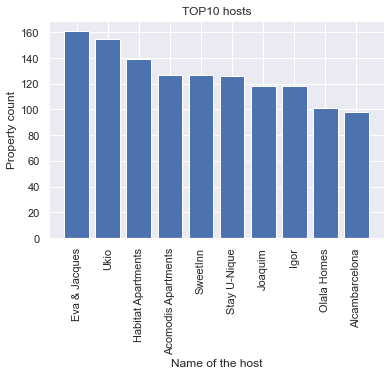

In [26]:
top=[]
for t in topID["host_id"].to_numpy():
    top.append(listings.loc[listings["host_id"] == t].iloc[1, 2])   
plt.bar(top,topID["count"])
plt.title('TOP10 hosts')
plt.xlabel('Name of the host') 
plt.ylabel('Property count')
plt.xticks(rotation=90);

Top 10 savininkų (daugiausiai uždirba)

In [27]:
topID2 = (listings.groupby(["host_id"])["host_name"].count().reset_index(name="count").sort_values(by="count", ascending=False).head(1000))
print(topID2)

        host_id  count
773     4459553    161
6309  346367515    155
4633  158023606    139
244     1447144    127
2544   32037490    127
...         ...    ...
2867   41652525      3
6511  404740164      3
4780  171824614      3
2878   41832053      3
851     5057234      3

[1000 rows x 2 columns]


In [28]:
cummulative_sum = (listings[listings["host_id"].isin(topID2["host_id"])].groupby("host_id")["price"].sum().sort_values(ascending=False).head(10))
cummulative_sum

host_id
175128252    109841
198281707     60000
4459553       56213
1447144       48378
340466110     46000
340465932     44878
158023606     34553
32037490      32426
129000409     28369
299462        27403
Name: price, dtype: int64

In [29]:
for c_id, c_sum in zip(cummulative_sum.index.to_numpy(), cummulative_sum.to_numpy()):
    print( f'{listings.loc[listings["host_id"] == c_id].iloc[1, 2]} earns {c_sum}')

Team Gospodin earns 109841
Casa Barcelo Camp Nou Hostel earns 60000
Eva & Jacques earns 56213
Acomodis Apartments earns 48378
ONA Hotels earns 46000
Ona Hotels earns 44878
Habitat Apartments earns 34553
SweetInn earns 32426
Olala Homes earns 28369
Stay U-Nique earns 27403


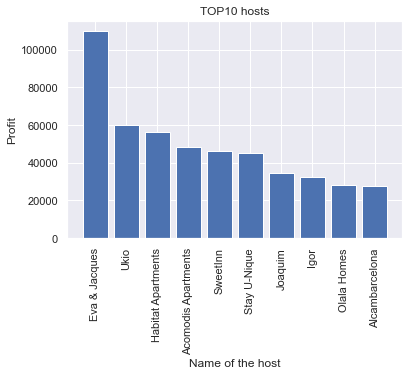

In [30]:
top=[]
for t in topID2["host_id"].head(10).to_numpy():
    top.append(listings.loc[listings["host_id"] == t].iloc[1, 2])      
plt.bar(top,cummulative_sum)
plt.title('TOP10 hosts')
plt.xlabel('Name of the host') 
plt.ylabel('Profit')
plt.xticks(rotation=90);

Daugiausiai komentarų turinti vieta

In [38]:
review = (listings.groupby(["name"])["number_of_reviews"].sum().reset_index(name="reviews").sort_values(by="reviews", ascending=False).head(1))
print(review)


                                        name  reviews
9178  Hola Hostal Eixample. Bed in a 24 dorm     1311


Kambarių tipų pasiskirstymas

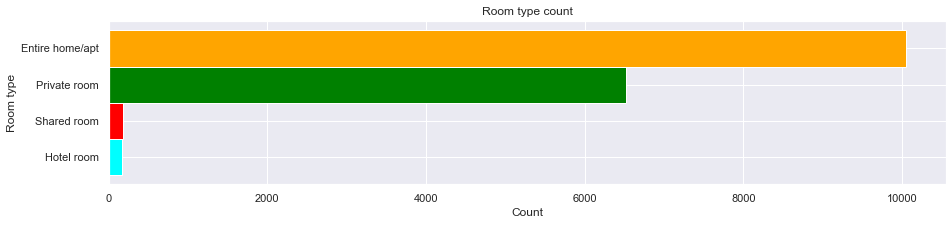

In [52]:
rooms = listings["room_type"].value_counts().sort_values(ascending=True)
rooms.plot.barh(figsize=(15, 3), width=1, color=["cyan", "red", "green", "orange"])
plt.title('Room type count')
plt.xlabel('Count') 
plt.ylabel('Room type');

Būstų pasiskirstymas pagal rajoną

In [76]:
hood = listings["neighbourhood"].value_counts().sort_values(ascending=True)
hood.plot.bar(figsize=(20, 5), width=1, cmap='winter')
plt.title('Rentals in neighbourhoods')
plt.xlabel('Neighbourhood') 
plt.ylabel('Count');

Minimalus naktų skaičius

In [75]:
mini= listings["minimum_nights"].value_counts().sort_values(ascending=False)
mini.plot.bar(figsize=(20, 5), width=1, color='green')
plt.title('Minimum nights')
plt.xlabel('Minimal stay, days') 
plt.ylabel('Count');